<a href="https://colab.research.google.com/github/tantai17132002/thuat_toan_toi_uu_khdl/blob/main/Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.
## Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance.
# problems:
## due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down.

![Screenshot%202020-09-20%20113512.png](attachment:Screenshot%202020-09-20%20113512.png)

## One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is akin to simulated annealing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset=pd.read_csv("salary.csv")
dataset.head()

,YearsExperience,Salary,age,company_change,type
0,1.1,39343,21,1,junior
1,1.3,46205,31,0,middle
2,1.5,37731,29,1,middle
3,2.0,43525,30,1,middle
4,2.2,39891,27,1,middle


In [ ]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
age                0
company_change     0
type               0
dtype: int64

In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0
age,30.0,34.266667,7.031620,21.0,29.00,34.0,37.75,56.0
company_change,30.0,0.400000,0.498273,0.0,0.00,0.0,1.00,1.0


In [ ]:
x=np.array(dataset['YearsExperience'])
y=np.array(dataset['Salary'])
l=len(x)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6)
lx=len(x_train)

In [ ]:
m=0.1
c=0.5
alpha=0.01
n=5000
for i in range(n):
    slope=0
    intercept=0
    for j in range(lx):
        random_index=np.random.randint(lx)
        intercept=intercept+((m*x_train[random_index:random_index+1]+c)-y_train[random_index:random_index+1])
        slope=slope+((m*x_train[random_index:random_index+1]+c)-y_train[random_index:random_index+1])*x_train[random_index:random_index+1]
        c=c-alpha*(intercept/lx)
        m=m-alpha*(slope/lx)

In [ ]:
print(f"slope is {m}")
print(f"intercept is {c}")

slope is [9304.78163087]
intercept is [23067.41234747]


In [ ]:
y_pred=np.dot(m[0],x_test)+c[0]
y_pred

array([ 33302.67214143, 118906.66314544, 112393.31600383,  50981.75724008,
        72382.75499109,  78896.1021327 ,  52842.71356626,  50051.279077  ])

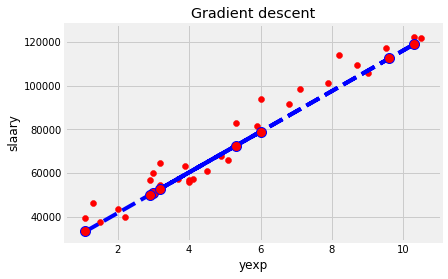

In [ ]:
plt.plot(x_test,y_pred,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel("yexp")
plt.ylabel("slaary")
plt.title("Gradient descent")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import explained_variance_score

In [ ]:
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

64958413.53216022
8059.678252396941
6609.592712772752
0.9728758219591127
0.9171695838072911


In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd=SGDRegressor(max_iter=6000,penalty=None,eta0=0.1,alpha=0.01)

In [ ]:
x_train=x_train.reshape(-1,1)
sgd.fit(x_train,y_train)

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=6000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
x_test=x_test.reshape(-1,1)
y_pred=sgd.predict(x_test)

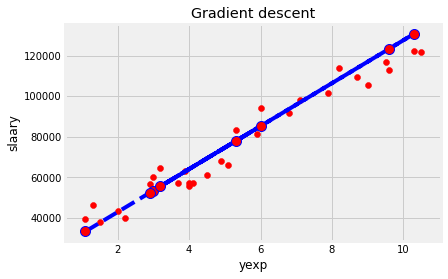

In [ ]:
plt.plot(x_test,y_pred,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel("yexp")
plt.ylabel("slaary")
plt.title("Gradient descent")
plt.show()

In [ ]:
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

48854820.12551736
6989.622316371419
6412.335991842068
0.9401408661805731
0.9377037574661045
